In [29]:
import area_weight as aw
import numpy as np
import xarray as xr

In [39]:
# Example resolution
lat_res = 0.1 
lon_res = 1

low=0
top=90

file_label=f"{low}to{top}"

# Create 1D latitude and longitude arrays
lats = np.arange(-90, 90+lat_res, lat_res)
lons = np.arange(-180, 180+lon_res, lon_res)

# Create a dummy DataArray (just to illustrate xarray usage)
ds = xr.DataArray(
    data=np.random.rand(len(lats), len(lons)),
    dims=('lat', 'lon'),
    coords={'lat': lats, 'lon': lons},
    name='dummy_data'
)

# Slice Arctic region: lat from 60 to 90
ds_arctic = ds.sel(lat=slice(0, 90))

# Extract the lat/lon arrays we will work with
lat_arctic = ds_arctic.lat.values
lon_arctic = ds_arctic.lon.values


In [40]:
##############################################################################
# 3) Compute area weights using three methods
##############################################################################

w_n = aw.get_weights( aw.neutral, lat_arctic, lon_arctic )

w_cos = aw.get_weights( aw.area_weight_cosine, lat_arctic, lon_arctic )

w_r = aw.get_weights( aw.area_weight_r_sinlat, lat_arctic, lon_arctic )

w_delta = (w_cos / w_cos.sum() - w_r / w_r.sum()) * w_n.sum()

w_cos = w_cos/w_cos.sum() * w_n.sum()

w_r = w_r/w_r.sum() * w_n.sum()

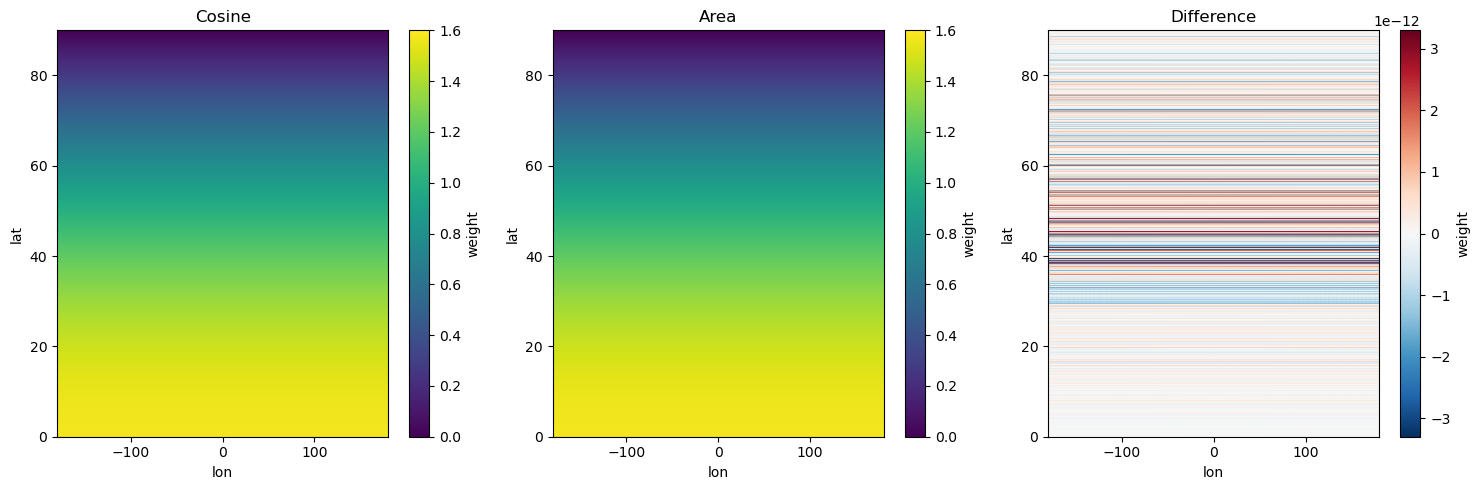

Figure saved as weights_plot_0.01_1_70to90.png


In [41]:
##############################################################################
# 4) Compare/inspect results
##############################################################################
import matplotlib.pyplot as plt

# Set figure size based on number of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot cos(lat) weights
w_cos.plot(ax=axes[0], vmin=0, vmax=1.6)
axes[0].set_title("Cosine")

# Plot r*sin(lat) weights
w_r.plot(ax=axes[1], vmin=0, vmax=1.6)
axes[1].set_title("Area")

# Plot r*sin(lat) weights
w_delta.plot(ax=axes[2])
axes[2].set_title("Difference")

# Adjust layout
plt.tight_layout()

# Save the figure with identification variables
filename = f"weights_plot_{lat_res}_{lon_res}_{file_label}.png"
plt.savefig(filename, dpi=300)

# Show the figure
plt.show()

# Print the filename for reference
print(f"Figure saved as {filename}")